<a href="https://colab.research.google.com/github/Bishwanath20/Handwritten-digit-recognizer/blob/main/Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


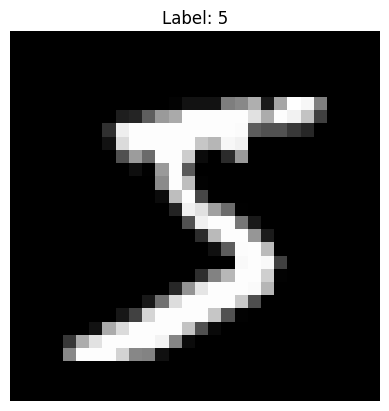

In [4]:

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.3775 - loss: 1.6850 - val_accuracy: 0.8948 - val_loss: 0.3468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8979 - loss: 0.3363 - val_accuracy: 0.9217 - val_loss: 0.2633
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9240 - loss: 0.2494 - val_accuracy: 0.9425 - val_loss: 0.1890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9402 - loss: 0.1932 - val_accuracy: 0.9561 - val_loss: 0.1496
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9511 - loss: 0.1599 - val_accuracy: 0.9642 - val_loss: 0.1260


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9576 - loss: 0.1471
Test Accuracy: 0.9642000198364258
Test Loss: 0.12602372467517853
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


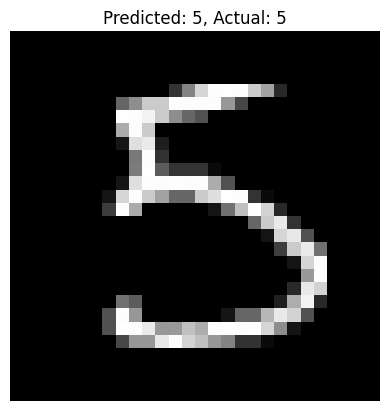

In [8]:
#Model Accuracy & Loss
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)
index = 15
#Predicted vs Actual
prediction = model.predict(x_test[index].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()


In [9]:
model.save("handwritten_digit_model.h5")
print("Model saved successfully")

Model saved successfully
